<a href="https://colab.research.google.com/github/ricardoV94/ThinkBayesPymc3/blob/master/ThinkBayes_Chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
pip install arviz

In [0]:
import numpy as np
import pymc3 as pm
import theano
import theano.tensor as tt
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

## 4.1 The Euro problem

In [3]:
with pm.Model() as m_4_1:
    hypo = pm.Uniform('hypo', lower=0, upper=1)
    like = pm.Bernoulli('like', p=hypo, observed=[1]*140 + [0]*110)
    trace_m_4_1 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [hypo]
100%|██████████| 2500/2500 [00:01<00:00, 1911.61it/s]


In [4]:
print('Mode', st.mode(trace_m_4_1['hypo'])[0][0])
print('Mean', np.mean(trace_m_4_1['hypo']))
print('Median', np.median(trace_m_4_1['hypo']))
print('95% CI', pm.stats.hpd(trace_m_4_1['hypo']))

Mode 0.5200941492616231
Mean 0.5583541377763859
Median 0.558874302974018
95% CI [0.49944704 0.61796164]


In [5]:
# Now with a triangular prior
with pm.Model() as m_4_3:
    hypo = pm.Triangular('hypo', lower=0, upper=1, c=0.5)
    like = pm.Bernoulli('like', p=hypo, observed=[1]*140 + [0]*110)
    trace_m_4_3 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [hypo]
100%|██████████| 2500/2500 [00:01<00:00, 1830.47it/s]


(0, 1)

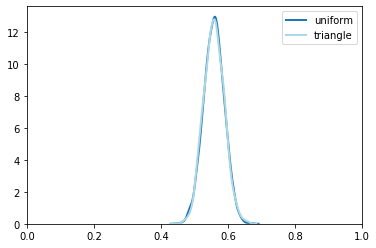

In [6]:
sns.distplot(trace_m_4_1['hypo'], color='C0', hist=False, kde_kws={'lw':2}, label='uniform')
sns.distplot(trace_m_4_3['hypo'], color='lightblue', hist=False, kde_kws={'lw':2}, label='triangle')
plt.legend();
plt.xlim([0,1])

In [7]:
# Now with a beta prior
with pm.Model() as m_4_5:
    hypo = pm.Beta('hypo', alpha=1, beta=1)
    like = pm.Bernoulli('like', p=hypo, observed=[1]*140 + [0]*110)
    trace_m_4_5 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [hypo]
100%|██████████| 2500/2500 [00:01<00:00, 1852.62it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f95f01557f0>],
      dtype=object)

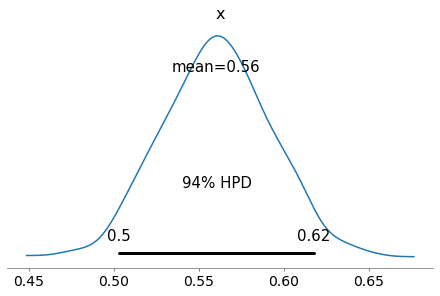

In [8]:
az.plot_posterior(trace_m_4_5['hypo'])